In [1]:
"""Import modules required to run the Jupyter notebook."""
from __future__ import annotations

# Clear logger to use tiatoolbox.logger
import logging

if logging.getLogger().hasHandlers():
    logging.getLogger().handlers.clear()

from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import skimage.color

from tiatoolbox import data, logger
from tiatoolbox.tools import stainnorm
from tiatoolbox.wsicore import wsireader

mpl.rcParams["figure.dpi"] = 150  # for high resolution figure in notebook

|2023-12-18|10:28:45.220| [INFO] Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
|2023-12-18|10:28:45.221| [INFO] Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
|2023-12-18|10:28:45.223| [INFO] NumExpr defaulting to 8 threads.


In [2]:
data_dir = "./tmp"
sample_file_name = "sample_wsi_small.svs"

user_sample_wsi_path = None


def download(url_path: str, save_path: str | Path) -> None:
    """Download url_path to save_path."""
    r = requests.get(url_path, timeout=60)
    with Path(save_path).open("wb") as f:
        f.write(r.content)


user_sample_wsi_path = None

if user_sample_wsi_path is None:
    sample_wsi_path = f"{data_dir}/{sample_file_name}"
else:
    sample_wsi_path = user_sample_wsi_path
if not Path(sample_wsi_path).exists():
    Path(sample_wsi_path).parent.mkdir(parents=True)
    url_path = (
        " https://tiatoolbox.dcs.warwick.ac.uk/sample_wsis/CMU-1-Small-Region.svs"
    )
    download(url_path, sample_wsi_path)

logger.info("Download is complete.")

|2023-12-18|10:28:46.696| [INFO] Download is complete.


('objective_power', 20.0)
('slide_dimensions', (2220, 2967))
('level_count', 1)
('level_dimensions', ((2220, 2967),))
('level_downsamples', [1.0])
('vendor', 'aperio')
('mpp', (0.499, 0.499))
('file_path', PosixPath('tmp/sample_wsi_small.svs'))
('axes', 'YXS')


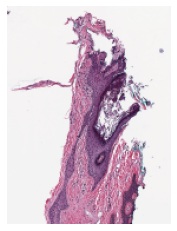

In [3]:
# create a file handler
wsi_reader = wsireader.WSIReader.open(input_img=sample_wsi_path)
wsi_info = wsi_reader.info.as_dict()
# we will print out each info line by line
print(*list(wsi_info.items()), sep="\n")  # noqa: T201
wsi_thumb = wsi_reader.slide_thumbnail(resolution=1.25, units="power")

plt.imshow(wsi_thumb)
plt.axis("off")
plt.show()

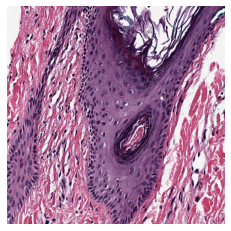

In [4]:
sample = wsi_reader.read_region(
    location=[800, 1600],
    level=0,
    size=[800, 800],  # in X, Y
)
plt.imshow(sample)
plt.axis("off")
plt.show()

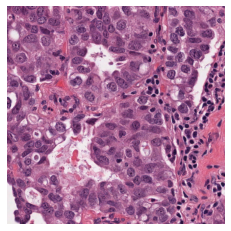

In [5]:
target_image = data.stain_norm_target()
plt.imshow(target_image)
plt.axis("off")
plt.show()

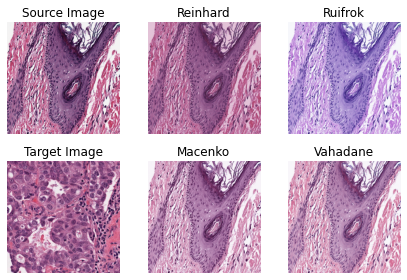

In [6]:
method_name_list = ["Reinhard", "Ruifrok", "Macenko", "Vahadane"]

plt.subplot(2, 3, 1)
plt.imshow(sample)
plt.title("Source Image")
plt.axis("off")
plt.subplot(2, 3, 4)
plt.imshow(target_image)
plt.title("Target Image")
plt.axis("off")

pos = [2, 3, 5, 6]
for idx, method_name in enumerate(method_name_list):

    stain_normalizer = stainnorm.get_normalizer(method_name)
    stain_normalizer.fit(target_image)
    normed_sample = stain_normalizer.transform(sample.copy())

    plt.subplot(2, 3, pos[idx])
    plt.imshow(normed_sample)
    plt.title(method_name.capitalize())
    plt.axis("off")
plt.tight_layout()
plt.show()